## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
rows_in_data = len(df.index)
rows_converted = (df['converted'] == 1).sum()
rows_converted/rows_in_data

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
aligned_not = len((df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')])) + len((df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]))
print(aligned_not)

3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(df.index[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')])
df2 = df2.drop(df2.index[(df2['group'] == 'control') & (df2['landing_page'] == 'new_page')])

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2.set_index('user_id').index.get_duplicates()

[773192]

c. What is the row information for the repeat **user_id**? 

In [12]:
df2.loc[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset = 'user_id',keep = 'first', inplace = True)

In [14]:
#let's double check to confirm it is dropped or not
df2.set_index('user_id').index.get_duplicates()

[]

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
rows_in_data = len(df2.index)
rows_converted = (df2['converted'] == 1).sum()
rows_converted/rows_in_data

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
total_rows_in_control = (df2['group'] == 'control').sum()
rows_converted = len((df2[(df2['group'] == 'control') & (df2['converted'] == 1)]))
rows_converted/total_rows_in_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
total_rows_in_treatment = (df2['group'] == 'treatment').sum()
rows_converted = len((df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)]))
rows_converted/total_rows_in_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
total_rows = len(df2.index)
total_rows_with_new_page = (df2['landing_page'] == 'new_page').sum()
total_rows_with_new_page/total_rows

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.** Over her the p_new is the probability conversion of new page and p_old is probability conversion of old_page. 

In [19]:
p_new = (rows_converted/total_rows_in_treatment)
p_old = (rows_converted/total_rows_in_control)
print(p_old,p_new)  

0.118837507056 0.118808065515


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**$H_{0}$**: **$p_{new}$** − **$p_{old}$** ≤ 0

**$H_{1}$**: **$p_{new}$** − **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
conversion_rate_null = (df2['converted'] == 1).sum() / len(df2.index)
p_new = conversion_rate_null
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
n_new = (df2['landing_page'] == 'new_page').sum()
n_new

145310

d. What is $n_{old}$?

In [23]:
n_old = (df2['landing_page'] == 'old_page').sum()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
df_new = df2[df2['landing_page'] == 'new_page']
converted = df_new['converted']
new_page_converted = np.random.choice(converted,n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
df_old = df2[df2['landing_page'] == 'old_page']
converted = df_old['converted']
old_page_converted = np.random.choice(converted,n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
p_new = new_page_converted.sum()/len(new_page_converted)
p_old = old_page_converted.sum()/len(old_page_converted)
print("p_new - p_old = ",p_new - p_old)
answer_of_g = p_new - p_old # used in j part

p_new - p_old =  -0.00418006179845


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [33]:
p_diffs = []
for i in range(10000):
    converted_new = np.random.choice([1,0], size=n_new, p=[conversion_rate_null, (1 - conversion_rate_null)])
    converted_old = np.random.choice([1,0], size=n_old, p=[conversion_rate_null, (1 - conversion_rate_null)])
    p_diffs.append(converted_new.mean() - converted_old.mean())

    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

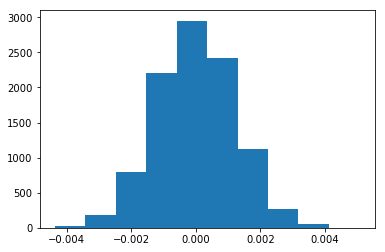

In [34]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
print("diffrence observed in g part : ",answer_of_g)
greater_than_g = (answer_of_g > p_diffs).mean()
print("proportion of p_diffs greater than g : ",greater_than_g)

diffrence observed in g part :  -0.00418006179845
proportion of p_diffs greater than g :  0.0001


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.** 

So, in the part j we have calculated the proportion of p_fiffs which are greater than observed value which we have observed in part g. So, in scientific terms this value is donated by the probability of observing our statistics if null hypothesis is true or not. Note this is below 5% needed to reject the null hypothesis for 95% confidence level

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = ((df2['converted'] == 1) & (df2['landing_page'] == 'old_page')).sum()
convert_new = ((df2['converted'] == 1) & (df2['landing_page'] == 'new_page')).sum()
n_old = (df2['landing_page'] == 'old_page').sum()
n_new = (df2['landing_page'] == 'new_page').sum()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
from scipy.stats import norm

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print('z_score', z_score)
print('z_score significant value :', norm.cdf(z_score))
print('norm.ppf', norm.ppf(1-(0.05/2)))

z_score 1.31092419842
z_score significant value : 0.905058312759
norm.ppf 1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
As the z_score is less then the critical value so we failed to reject the null hypothesis.It is same as above conclusion

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

A simple linear regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2['intercept'] = 1
df2['a/b_page'] = df2['group'].replace(('control','treatment'),(0,1))
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,a/b_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
lm = sm.OLS(df2['converted'],df2[['intercept','a/b_page']])
result = lm.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Fri, 08 Dec 2017   Prob (F-statistic):              0.190
Time:                        23:46:18   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
a/b_page      -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

In linear regression we define the line y = $\beta_0 + \beta_1 x$.For null hyothesis $\beta_1$ is 0 or the slope is 0 And for the alternative hypothtesis is not 0.So, Which means that new_page is better or old_page is better are part of alternative hypothesis as the solpe can be positive or negative. So, In part two the null hypothesis was that the new page is equal to or worse than the old page and in alternative hypothesis new page is better.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
When we got the summary we found that the r_squared is equal to zero.So, It is good to add other factors.yes, as it increases the complexity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [44]:
# loading countries,csv into this file
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [45]:
#seeing if any value is missing or not
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [46]:
#checking user_id values
countries.user_id.nunique()

290584

In [47]:
#checking unique values for contries
countries.country.nunique()

3

In [49]:
df_new = pd.merge(df2,countries,on = 'user_id')
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,a/b_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [51]:
df_new['us_intercept'] = df_new['country'].replace(('US','UK','CA'),(1,0,0))
lm = sm.OLS(df_new['converted'],df_new[['intercept','us_intercept']])
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01634
Date:                Fri, 08 Dec 2017   Prob (F-statistic):              0.898
Time:                        23:55:57   Log-Likelihood:                -85268.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.1197      0.001    108.797      0.000       0.118       0.122
us_intercept    -0.0002      0.001     -0.128      0.898      -0.003       0.002
==============================================================================
Omnibus:                   125554.657   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414321.504
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         3.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df_new['uk_intercept'] = df_new['country'].replace(('US','UK','CA'),(0,1,0))
lm = sm.OLS(df_new['converted'],df_new[['intercept','uk_intercept']])
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9121
Date:                Fri, 08 Dec 2017   Prob (F-statistic):              0.340
Time:                        23:56:21   Log-Likelihood:                -85268.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.1193      0.001    171.656      0.000       0.118       0.121
uk_intercept     0.0013      0.001      0.955      0.340      -0.001       0.004
==============================================================================
Omnibus:                   125554.026   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414317.226
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
df_new['ca_intercept'] = df_new['country'].replace(('US','UK','CA'),(0,0,1))
lm = sm.OLS(df_new['converted'],df_new[['intercept','ca_intercept']])
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.653
Date:                Fri, 08 Dec 2017   Prob (F-statistic):              0.103
Time:                        23:58:20   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.1198      0.001    194.025      0.000       0.119       0.121
ca_intercept    -0.0045      0.003     -1.629      0.103      -0.010       0.001
==============================================================================
Omnibus:                   125552.776   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414308.692
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         4.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So in all the case the R_squared value is 0 again.But the intercept value are 0.1197,0.1193,0.1198 which is minimal change in each country.so by adding the countries to our data, it doesn't show any effect.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
lm = sm.OLS(df_new['converted'],df_new[['a/b_page','us_intercept']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                 1.465e+04
Date:                Sat, 09 Dec 2017   Prob (F-statistic):               0.00
Time:                        00:07:16   Log-Likelihood:                -89814.
No. Observations:              290584   AIC:                         1.796e+05
Df Residuals:                  290582   BIC:                         1.797e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
a/b_page         0.0539      0.001     50.204      0.000       0.052       0.056
us_intercept     0.0926      0.001    102.110      0.000       0.091       0.094
==============================================================================
Omnibus:                   120830.646   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           382991.286
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                       6.335   Cond. No.                         2.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
lm = sm.OLS(df_new['converted'],df_new[['a/b_page','uk_intercept']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                 1.060e+04
Date:                Sat, 09 Dec 2017   Prob (F-statistic):               0.00
Time:                        00:07:41   Log-Likelihood:                -93544.
No. Observations:              290584   AIC:                         1.871e+05
Df Residuals:                  290582   BIC:                         1.871e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
a/b_page         0.1014      0.001    108.368      0.000       0.100       0.103
uk_intercept     0.0701      0.001     52.888      0.000       0.067       0.073
==============================================================================
Omnibus:                   118958.012   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           371353.163
Skew:                           2.232   Prob(JB):                         0.00
Kurtosis:                       6.277   Cond. No.                         1.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
lm = sm.OLS(df_new['converted'],df_new[['a/b_page','ca_intercept']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     9329.
Date:                Sat, 09 Dec 2017   Prob (F-statistic):               0.00
Time:                        00:07:42   Log-Likelihood:                -94733.
No. Observations:              290584   AIC:                         1.895e+05
Df Residuals:                  290582   BIC:                         1.895e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
a/b_page         0.1159      0.001    130.166      0.000       0.114       0.118
ca_intercept     0.0569      0.003     20.189      0.000       0.051       0.062
==============================================================================
Omnibus:                   118898.747   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           370862.343
Skew:                           2.232   Prob(JB):                         0.00
Kurtosis:                       6.273   Cond. No.                         3.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='conclusions'></a>
## Conclusions

So,Now we have found that the R_squared value for every country is pretty low i.e. us: 0.092,uk: 0.068 , ca: 0.062 which is a bad fit. So, We failed to reject the null hypothesis Which means that the old page is better.

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.